## PCA

## n_components:int, float, None or str

## whiten:bool, optional (default False)

## svd_solver:str {‘auto’, ‘full’, ‘arpack’, ‘randomized’}

## tol:float >= 0, optional (default .0)

## iterated_power:int >= 0, or ‘auto’, (default ‘auto’)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()

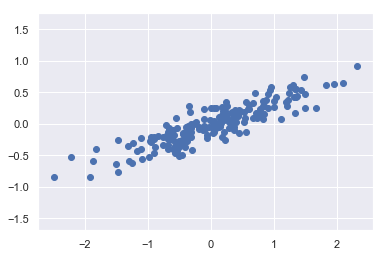

In [2]:
rng=np.random.RandomState(1)
x=np.dot(rng.rand(2,2),rng.randn(2,200)).T
plt.scatter(x[:,0],x[:,1])
plt.axis('equal')
plt.show()

In [3]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [4]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [5]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


In [11]:
def draw_vector(v0,v1,ax=None):
    ax=ax or plt.gca()
    arrowprops=dict(arrowstyle='->',linewidth=2,shrinkA=0,shrinkB=0)
    ax.annotate('',v1,v0,arrowprops=arrowprops)
    plt.scatter(x[:,0],x[:,1],alpha=0.2)
    for length,vector in zip(pca.explained_variance,pca.components_):
        v=vector*3*np.sqrt(length)
        draw_vector(pca.mean_,pca.mean_+v)
    plt.axis('equal')
    plt.show()

In [12]:
pca=PCA(n_components=1)
pca.fit(x)
x_pca=pca.transform(x)
print("original shape:",x.shape)
print("transformed shape:",x_pca.shape)

original shape: (200, 2)
transformed shape: (200, 1)


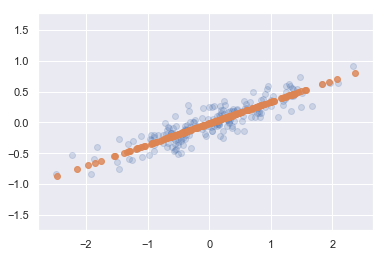

In [13]:
x_new=pca.inverse_transform(x_pca)
plt.scatter(x[:,0],x[:,1],alpha=0.2)
plt.scatter(x_new[:,0],x_new[:,1],alpha=0.8)
plt.axis('equal')
plt.show()

In [14]:
from sklearn.datasets import load_digits
digits=load_digits()
digits.data.shape

(1797, 64)

In [15]:
pca=PCA(2)
projected=pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


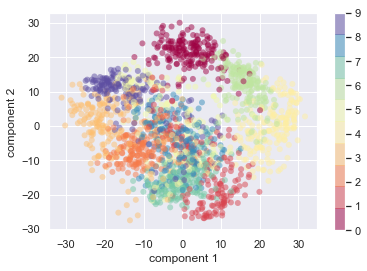

In [17]:
plt.scatter(projected[:,0],projected[:,1],c=digits.target,edgecolor='none',alpha=0.5,cmap=plt.cm.get_cmap('Spectral',10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

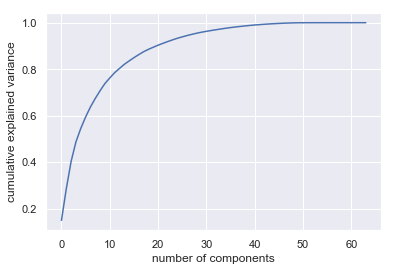

In [18]:
pca=PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [ ]:
# 定義 PCA 與隨後的邏輯斯迴歸函數
logistic = SGDClassifier(loss='log', penalty='l2', max_iter=10000, tol=1e-5, random_state=0)
pca = PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

# 載入手寫數字辨識集
digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

In [ ]:
# 先執行 GridSearchCV 跑出最佳參數
param_grid = {
    'pca__n_components': [4, 10, 20, 30, 40, 50, 64],
    'logistic__alpha': np.logspace(-4, 4, 5),
}
search = GridSearchCV(pipe, param_grid, iid=False, cv=5, return_train_score=False)
search.fit(X_digits, y_digits)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

In [ ]:

# 繪製不同 components 的 PCA 解釋度
pca.fit(X_digits)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(pca.explained_variance_ratio_, linewidth=2)
ax0.set_ylabel('PCA explained variance')

ax0.axvline(search.best_estimator_.named_steps['pca'].n_components, linestyle=':', label='n_components chosen')
ax0.legend(prop=dict(size=12))

results = pd.DataFrame(search.cv_results_)
components_col = 'param_pca__n_components'
best_clfs = results.groupby(components_col).apply(lambda g: g.nlargest(1, 'mean_test_score'))

best_clfs.plot(x=components_col, y='mean_test_score', yerr='std_test_score', legend=False, ax=ax1)
ax1.set_ylabel('Classification accuracy (val)')
ax1.set_xlabel('n_components')
plt.tight_layout()
plt.show()

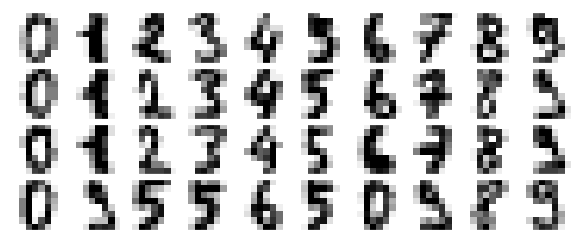

In [20]:
def plot_digits(data):
    fig,axes=plt.subplots(4,10,figsize=(10,4),subplot_kw={'xticks':[],'yticks':[]},gridspec_kw=dict(hspace=0.1,wspace=0.1))
    for i,ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8,8),cmap='binary',interpolation='nearest',clim=(0,16))
plot_digits(digits.data)

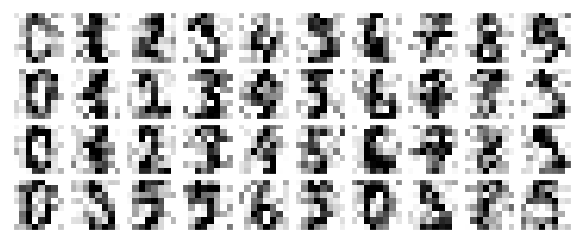

In [21]:
np.random.seed(42)
noisy=np.random.normal(digits.data,4)
plot_digits(noisy)

In [22]:
pca=PCA(0.5).fit(noisy)
pca.n_components_

12

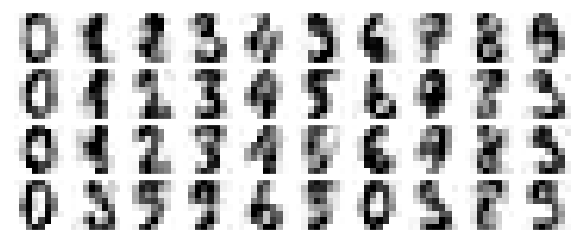

In [23]:
components=pca.transform(noisy)
filtered=pca.inverse_transform(components)
plot_digits(filtered)

In [ ]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(x,y,classifier,resolution=0.02):
    markers=('s','x','o','^','v')
    colors=('red','blue','lightgreen','gray','cyan')
    cmap=ListedColormap(colors[:len(np.unique(y))])
    x1_min,x1_max=x[:,0].min()-1,x[:,0].max()+1
    x2_min,x2_max=x[:,1].min()-1,x[:,1].max()+1
    xx1,xx2=np.meshgrid(np.arange(x1_min,x1_max,resolution),np.arange(x2_min,x2_max,resolution))
    z=classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    z=z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,z,alpha=0.4,cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x=x[y==cl,0],y=x[y==cl,1],alpha=0.8,c=cmap(idx),marker=markers[idx],label=cl)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
lr=LogisticRegression()
x_train_pca=pca.fit_transform(x_train_std)
x_test_pca=pca.transform(x_test_std)
lr.fit(x_train_pca,y_train)
plot_decision_regions(x_train_pca,y_train,classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.show()

In [ ]:
plot_decision_regions(x_test_pca,y_test,classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.show()

In [ ]:
pca=PCA(n_components=None)
x_train_pca=pca.fit_transform(x_train_std)
pca.explained_variance_ratio_

## 核主成分分析

## n_components:int, default=None

## kernel:“linear” | “poly” | “rbf” | “sigmoid” | “cosine” | “precomputed”

## gamma:float, default=1/n_features

## degree:int, default=3

## coef0:float, default=1

## kernel_params:mapping of string to any, default=None

## alpha:int, default=1.0

## fit_inverse_transform:bool, default=False

## eigen_solver:string [‘auto’|’dense’|’arpack’], default=’auto’

## tol:float, default=0

## max_iter:int, default=None

## remove_zero_eig:boolean, default=False

In [ ]:
from sklearn.decomposition import KernelPCA
x,y=make_moons(n_samples=100,random_state=123)
scikit_kpca=KernelPCA(n_components=2,kernel='rbf',gamma=15)
x_skernpca=scikit_kpca.fit_transform(x)

In [ ]:
plt.scatter(x_skernpca[y==0,0],x_skernpca[y==0,1],color='red',marker='^',alpha=0.5)
plt.scatter(x_skernpca[y==1,0],x_skernpca[y==1,1],color='blue',marker='o',alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

## Sparse PCA

## n_components:int

## alpha:float

## ridge_alpha:float

## max_iter:int

## tol:float

## method{‘lars’, ‘cd’}

## U_init:array of shape (n_samples, n_components)

## V_init:array of shape (n_components, n_features)

## normalize_components:‘deprecated’

In [ ]:
import numpy as np
from sklearn.datasets import make_friedman1
from sklearn.decomposition import SparsePCA
X, _ = make_friedman1(n_samples=200, n_features=30, random_state=0)
transformer = SparsePCA(n_components=5, random_state=0)
transformer.fit(X)
X_transformed = transformer.transform(X)
X_transformed.shape
np.mean(transformer.components_ == 0)

## Minibatch sparse pca

In [ ]:
import numpy as np
from sklearn.datasets import make_friedman1
from sklearn.decomposition import MiniBatchSparsePCA
X, _ = make_friedman1(n_samples=200, n_features=30, random_state=0)
transformer = MiniBatchSparsePCA(n_components=5, batch_size=50,
                                random_state=0)
transformer.fit(X)

X_transformed = transformer.transform(X)
X_transformed.shape
np.mean(transformer.components_ == 0)

## IncrementalPCA

## n_components:int or None, (default=None)

## whiten:bool, optional

## batch_size:int or None, (default=None)

In [ ]:
from sklearn.datasets import load_digits
from sklearn.decomposition import IncrementalPCA
from scipy import sparse
X, _ = load_digits(return_X_y=True)
transformer = IncrementalPCA(n_components=7, batch_size=200)
transformer.partial_fit(X[:100, :])
IncrementalPCA(batch_size=200, n_components=7)
X_sparse = sparse.csr_matrix(X)
X_transformed = transformer.fit_transform(X_sparse)
X_transformed.shape

## TruncatedSVD(LSA)

## n_components:int, default = 2

## algorithm:string, default = “randomized”

## n_iter:int, optional (default 5)

## tol:float, optional

In [ ]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import random as sparse_random
from sklearn.random_projection import sparse_random_matrix
X = sparse_random(100, 100, density=0.01, format="csr",random_state=42)
svd = TruncatedSVD(n_components=5, n_iter=7, random_state=42)
svd.fit(X)
print(svd.explained_variance_ratio_)
print(svd.explained_variance_ratio_.sum())
print(svd.singular_values_)

## 使用pca雜訊過濾

In [ ]:
from sklearn.datasets import load_digits
digits=load_digits()
digits.data.shape
pca=PCA(2)
projects=pca.fit_transform(digits.data)
print(digits.data.shape)
print(projects.shape)

plt.scatter(projects[:,0],projects[:,1],c=digits.target,edgecolor='none',alpha=0.5,cmap=plt.cm.get_cmap('spectral',10))
plt.xlabel('components 1')
plt.ylabel('components 2')
plt.colorbar()

pca=PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
##使用pca做雜訊過濾
def plot_digits(data):
    fig,axes=plt.subplots(4,10,figsize=(10,4),subplot_kw={'xticks':[],'yticks':[]},gridspec_kw=dict(hspace=0.1,wspace=0.1))
    for i,ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8,8),cmap='binary',interpolation='nearest',clim=(0,16))
plot_digits(digits.data)

np.random.seed(42)
noisy=np.random.normal(digits.data,4)
plot_digits(noisy)

components=pca.transform(noisy)
filtered=pca.inverse_transform(components)
plot_digits(filtered)

## 3維繪圖

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
centers = [[1, 1], [-1, -1], [1, -1]]
pca = decomposition.PCA(n_components=3)

In [ ]:
pca.fit(X)
X = pca.transform(X)

fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()


for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()